In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import deepthought, mne, os

from deepthought.util.logging_util import configure_custom
configure_custom(debug=False)
mne.set_log_level('INFO')

subjects = ['P01','P04','P06','P07','P09','P11','P12','P13','P14']
# subjects = ['P01']

sfreq = 128
# sfreq = 512 # no down-sampling - !!! watch memory usage !!!

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from deepthought.experiments.bcmi2015.preprocessing import preload
raw_cache, events_cache = preload(subjects, sfreq=sfreq, onsets='audio', verbose=False,
                                  interpolate_bad_channels=True,
                                  reference_mastoids=False) # important!!! cannot combine different references

Loading raw data for subject "P01" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P01-raw.fif
540 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1000 1111 2001]
This file contains some EEG channels marked as bad: [u'P8', u'P10', u'T8']
Interpolating bad channels...
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Band-pass filtering from 0.5 - 30 Hz


[Parallel(n_jobs=4)]: Done   1 out of  61 | elapsed:    0.6s remaining:   38.8s
[Parallel(n_jobs=4)]: Done  11 out of  61 | elapsed:    2.1s remaining:    9.7s
[Parallel(n_jobs=4)]: Done  24 out of  61 | elapsed:    4.0s remaining:    6.1s
[Parallel(n_jobs=4)]: Done  37 out of  61 | elapsed:    5.9s remaining:    3.8s
[Parallel(n_jobs=4)]: Done  50 out of  61 | elapsed:    7.6s remaining:    1.7s
[Parallel(n_jobs=4)]: Done  61 out of  61 | elapsed:    9.1s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx


/usr/local/lib/python2.7/dist-packages/xlrd/xlsx.py:246: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.getiterator():
/usr/local/lib/python2.7/dist-packages/xlrd/xlsx.py:292: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.getiterator():


beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P01-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 61 components, channels used: "eeg", 4 sources marked for exclusion>
[0, 1, 3, 11]
Transforming to ICA space (61 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 61 PCA components
Loading raw data for subject "P04" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P04-raw.fif
540 events found
Events id: [  11   12   13   14   

[Parallel(n_jobs=4)]: Done   1 out of  63 | elapsed:    0.7s remaining:   42.5s
[Parallel(n_jobs=4)]: Done  13 out of  63 | elapsed:    2.2s remaining:    8.7s
[Parallel(n_jobs=4)]: Done  26 out of  63 | elapsed:    3.9s remaining:    5.6s
[Parallel(n_jobs=4)]: Done  39 out of  63 | elapsed:    5.8s remaining:    3.6s
[Parallel(n_jobs=4)]: Done  52 out of  63 | elapsed:    7.5s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  63 out of  63 | elapsed:    8.8s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P04-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 5

[Parallel(n_jobs=4)]: Done   1 out of  62 | elapsed:    0.7s remaining:   41.5s
[Parallel(n_jobs=4)]: Done  12 out of  62 | elapsed:    2.1s remaining:    8.7s
[Parallel(n_jobs=4)]: Done  25 out of  62 | elapsed:    3.7s remaining:    5.5s
[Parallel(n_jobs=4)]: Done  38 out of  62 | elapsed:    5.4s remaining:    3.4s
[Parallel(n_jobs=4)]: Done  51 out of  62 | elapsed:    7.1s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:    8.4s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P06-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 5

[Parallel(n_jobs=4)]: Done   1 out of  64 | elapsed:    0.7s remaining:   45.5s
[Parallel(n_jobs=4)]: Done  14 out of  64 | elapsed:    2.4s remaining:    8.6s
[Parallel(n_jobs=4)]: Done  27 out of  64 | elapsed:    4.2s remaining:    5.8s
[Parallel(n_jobs=4)]: Done  40 out of  64 | elapsed:    5.9s remaining:    3.5s
[Parallel(n_jobs=4)]: Done  53 out of  64 | elapsed:    7.6s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    9.1s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P07-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 5

[Parallel(n_jobs=4)]: Done   1 out of  64 | elapsed:    0.7s remaining:   42.8s
[Parallel(n_jobs=4)]: Done  14 out of  64 | elapsed:    2.3s remaining:    8.2s
[Parallel(n_jobs=4)]: Done  27 out of  64 | elapsed:    4.0s remaining:    5.5s
[Parallel(n_jobs=4)]: Done  40 out of  64 | elapsed:    5.6s remaining:    3.4s
[Parallel(n_jobs=4)]: Done  53 out of  64 | elapsed:    7.3s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    8.6s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P09-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 63 components, channels used: "eeg", 4 sources marked for exclusion>
[

[Parallel(n_jobs=4)]: Done   1 out of  62 | elapsed:    0.8s remaining:   49.7s
[Parallel(n_jobs=4)]: Done  12 out of  62 | elapsed:    2.4s remaining:   10.1s
[Parallel(n_jobs=4)]: Done  25 out of  62 | elapsed:    4.4s remaining:    6.5s
[Parallel(n_jobs=4)]: Done  38 out of  62 | elapsed:    6.3s remaining:    4.0s
[Parallel(n_jobs=4)]: Done  51 out of  62 | elapsed:    8.3s remaining:    1.8s
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:   10.0s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P11-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 61 components, channels used: "eeg", 3 sources marked for exclusion>
[

[Parallel(n_jobs=4)]: Done   1 out of  62 | elapsed:    0.7s remaining:   42.7s
[Parallel(n_jobs=4)]: Done  12 out of  62 | elapsed:    2.1s remaining:    8.8s
[Parallel(n_jobs=4)]: Done  25 out of  62 | elapsed:    3.9s remaining:    5.8s
[Parallel(n_jobs=4)]: Done  38 out of  62 | elapsed:    5.6s remaining:    3.5s
[Parallel(n_jobs=4)]: Done  51 out of  62 | elapsed:    7.3s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:    8.7s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P12-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 61 components, channels used: "eeg", 2 sources marked for exclusion>
[

[Parallel(n_jobs=4)]: Done   1 out of  63 | elapsed:    0.9s remaining:   56.7s
[Parallel(n_jobs=4)]: Done  13 out of  63 | elapsed:    2.5s remaining:    9.5s
[Parallel(n_jobs=4)]: Done  26 out of  63 | elapsed:    4.2s remaining:    6.0s
[Parallel(n_jobs=4)]: Done  39 out of  63 | elapsed:    6.0s remaining:    3.7s
[Parallel(n_jobs=4)]: Done  52 out of  63 | elapsed:    7.8s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  63 out of  63 | elapsed:    9.3s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P13-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 62 components, channels used: "eeg", 4 sources marked for exclusion>
[0, 1, 5, 4

[Parallel(n_jobs=4)]: Done   1 out of  62 | elapsed:    0.7s remaining:   40.2s
[Parallel(n_jobs=4)]: Done  12 out of  62 | elapsed:    2.2s remaining:    9.0s
[Parallel(n_jobs=4)]: Done  25 out of  62 | elapsed:    3.9s remaining:    5.8s
[Parallel(n_jobs=4)]: Done  38 out of  62 | elapsed:    5.7s remaining:    3.6s
[Parallel(n_jobs=4)]: Done  51 out of  62 | elapsed:    7.4s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:    8.7s finished


360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
trial events: (360, 3)
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
beat events: (7340, 3)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]
Reading /imaging/deepthought/datasets/OpenMIIR/eeg/preprocessing/ica/P14-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
<ICA  |  epochs decomposition, fit (fastica): 529100 samples, 61 components, channels used: "eeg", 5 sources marked for exclusion>
[

In [23]:
from deepthought.datasets.openmiir.preprocessing.events import generate_beat_events, filter_beat_events
from deepthought.datasets.openmiir.metadata import get_stimuli_version

def get_beat_epochs(
        subjects,
        tmin=-0.2,
        tmax=0.3,
        stimulus_ids='any',  # 1..4, 11..14, 21..24
        conditions='any',    # 1..4
        beat_counts='any',   # 1..4
        cue_value='any',     # 0=cue, 1=regular
        verbose=False
    ):     
    
    epochs = []
    for subject in subjects:
        version = get_stimuli_version(subject)

        raw = raw_cache[subject]
        trial_events = events_cache[subject]

        beat_events = generate_beat_events(
            trial_events,
            include_cue_beats=True,
            sr=sfreq,
            version=version,
        )
#         print beat_events.shape

        # optional filtering
        beat_events = filter_beat_events(
            beat_events, 
            stimulus_ids=stimulus_ids,
            conditions=conditions,
            beat_counts=beat_counts,
            cue_value=cue_value)
#         print beat_events.shape

        # select all EEG channels
        picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False, exclude=[])

        # extract epochs from raw data
        new_epochs = mne.Epochs(
            raw,
            beat_events, 
            event_id=None, tmin=tmin, tmax=tmax, 
            preload=True, proj=False, picks=picks, verbose=False)
        
        if len(new_epochs.info['bads']) > 0:
            new_epochs.interpolate_bads() # important!!!
            new_epochs.info['bads'] = [] # reset bad channels to allow concatenation
        
        new_epochs.info['projs'] = []
#         new_epochs.proj = []
#         print new_epochs.info
        
        epochs.append(new_epochs)

    epochs = mne.epochs.concatenate_epochs(epochs)
    if verbose:
        print epochs
    return epochs

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 317
Computing interpolation matrix from 63 sensor positions
Inte

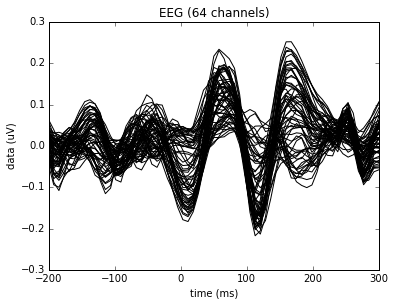

In [24]:
# all beats (including cue)
get_beat_epochs(subjects, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 317
Computing interpolation matrix from 63 sensor positions
Inte

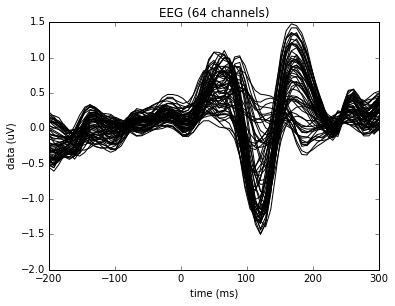

In [25]:
# cue click ERPs - note the scale!
get_beat_epochs(subjects, cue_value=0, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 317
Computing interpolation matrix from 63 sensor positions
Inte

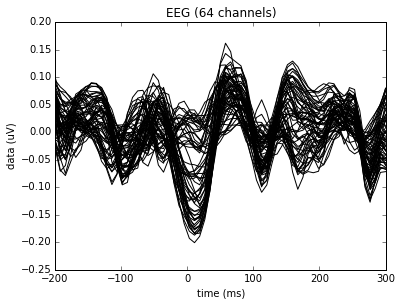

In [26]:
# non-cue beat ERPs, all conditions
get_beat_epochs(subjects, cue_value=1, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 317
Computing interpolation matrix from 63 sensor positions
Inte

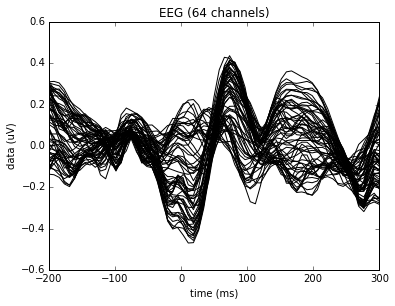

In [27]:
# non-cue beat ERPs, perception condition
get_beat_epochs(subjects, conditions=[1], cue_value=1, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 289
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors
Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v1.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
Channel interpolation is currently only implemented for EEG. The MEG channels marked as bad will remain untouched.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 317
Computing interpolation matrix from 63 sensor positions
Inte

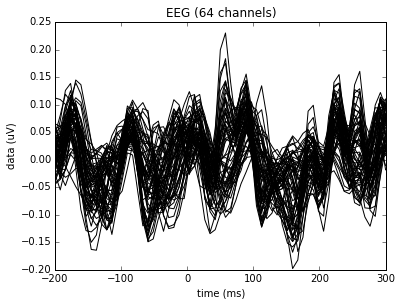

In [28]:
# non-cue beat ERPs, cued imagination condition
get_beat_epochs(subjects, conditions=[2], cue_value=1, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
<Epochs  |  n_events : 1835 (all good), tmin : -0.2 (s), tmax : 0.3 (s), baseline : None,
 '101211': 80, '101212': 80, '101213': 75, '102211': 40, '102212': 40, '102213': 40, '103211': 40, '103212': 40, '103213': 40, '103214': 40, '104211': 40, '104212': 40, '104213': 40, '104214': 35, '111211': 80, '111212': 80, '111213': 75, '112211': 40, '112212': 40, '112213': 40, '113211': 40, '113212': 40, '113213': 35, '113214': 35, '114211': 40, '114212': 40, '114213': 40, '114214': 40, '121211': 40, '121212': 40, '121213': 40, '122211': 75, '122212': 75, '122213': 70, '123211': 20, '123212': 20, '123213': 20, '123214': 20, '124211': 20, '124212': 20, '124213': 20, '124214': 20>


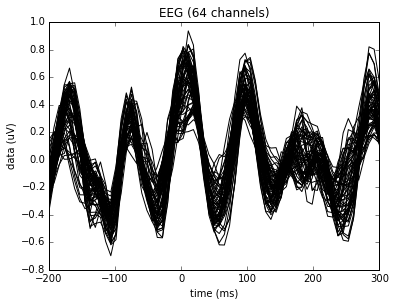

In [31]:
# This looks very intersting!!!
# non-cue beat ERPs, cued imagination condition, selected subject
get_beat_epochs(subjects=['P09'], conditions=[2], cue_value=1, verbose=True).average().plot();

Loading stimulus metadata from /imaging/deepthought/datasets/OpenMIIR/meta/Stimuli_Meta.v2.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
<Epochs  |  n_events : 1835 (all good), tmin : -0.2 (s), tmax : 0.3 (s), baseline : None,
 '101111': 80, '101112': 80, '101113': 75, '102111': 40, '102112': 40, '102113': 40, '103111': 40, '103112': 40, '103113': 40, '103114': 40, '104111': 40, '104112': 40, '104113': 40, '104114': 35, '111111': 80, '111112': 80, '111113': 75, '112111': 40, '112112': 40, '112113': 40, '113111': 40, '113112': 40, '113113': 35, '113114': 35, '114111': 40, '114112': 40, '114113': 40, '114114': 40, '121111': 40, '121112': 40, '121113': 40, '122111': 75, '122112': 75, '122113': 70, '123111': 20, '123112': 20, '123113': 20, '123114': 20, '124111': 20, '124112': 20, '124113': 20, '124114': 20>


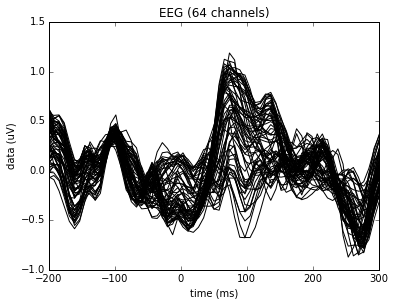

In [32]:
get_beat_epochs(subjects=['P09'], conditions=[1], cue_value=1, verbose=True).average().plot();